# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd

# 1.Loadig data from local file named "creditcard.csv"
# Also shuffling the data randomly

data = pd.read_csv("creditcard.csv") 
# Preview the first 5 lines of the loaded data 
data = data.sample(frac=1)

#data.head()

In [2]:
# checking for NULL values
print(data.info())

# there is no null value 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 194684 to 94373
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21   

In [3]:
#data1 = data.iloc[:,1:29]  # excluding time
#data2 = data.iloc[:,30:]   # excluding amount
#data3 = data1.join(data2)
#data3.info()

In [4]:
# Checking the data spread.
print(data.describe())

# too much spread as in time and amount as compared to other variables
# so we need to normalize it

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.177157e-15  3.382978e-16 -1.400967e-15  2.094303e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.004864e-15  1.495371e-15 -5.634306e-16  1.140882e-16 -2.411270e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [17]:
# Appliting standard scaler on variable amount

from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()  # normalizing the values using standard scaler between 0-1
time   = data['Time'].values
amount = data['Amount'].values

data['Time'] = StdScaler.fit_transform(time.reshape(-1, 1))
data['Amount'] = StdScaler.fit_transform(amount.reshape(-1, 1))

#data['Amount'].head(10)

In [6]:
# splittig the features and target variables

x = data.drop('Class', axis = 1).values
y = data['Class'].values

In [7]:
from sklearn.model_selection import train_test_split

# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.5  # 50%
ratio_test  = 0.3  # 30%
ratio_val   = 0.2  # 20%
# Produces 30% test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(x, y, test_size=ratio_test, random_state=42)

# Adjusts val ratio, w.r.t. remaining dataset 
ratio_remaining = 1 - ratio_test   # (70% left).
ratio_val_adjusted = ratio_val / ratio_remaining  # 20% of 70%

# Produces train and val splits.
x_train, x_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

In [8]:
# creating model

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
# compiling model

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer='rmsprop',
             #loss='binary_crossebtropy',
             loss='binary_crossentropy',
             metrics='accuracy')

In [10]:
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#             loss=losses.mse,
#             metrics=metrics.binary_accuracy)

In [11]:
# training the model

history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=256,
                    validation_data=(x_val, y_val))

# Model is performing acceptable lavel at around 11 epochs

Epoch 1/100
557/557 [==============================] - 7s 8ms/step - loss: 0.1792 - accuracy: 0.9739 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 2/100
557/557 [==============================] - 4s 6ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 3/100
557/557 [==============================] - 4s 7ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 4/100
557/557 [==============================] - 3s 5ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 5/100
557/557 [==============================] - 2s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 6/100
557/557 [==============================] - 4s 6ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 7/100
557/557 [==============================] - 4s 8ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0022 - val_accuracy: 0.9995

In [12]:
# evaluating

history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

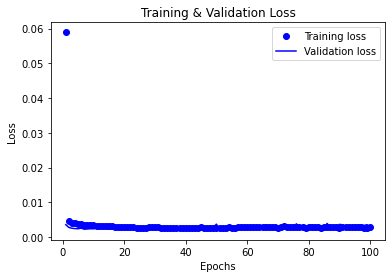

In [13]:
# evaluating validation loss

import matplotlib.pyplot as plt

history_dict=history.history
loss_value = history_dict['loss']
val_loss_value=history_dict['val_loss']
acc=history_dict['accuracy']   # missing in the book
val_acc=history_dict['val_accuracy']

epochs = np.arange(1, len(acc)+1)

plt.plot(epochs, loss_value, 'bo', label='Training loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation loss')

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

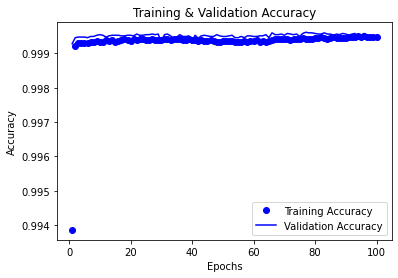

In [14]:
# evaluating validation accuracy

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# pridcting on test values

test_loss_score, test_accuracy_score = model.evaluate(x_test, y_test)

# display test loss
display(test_loss_score)
#is coming lestt than 1 %

# display test predic 
display (test_accuracy_score)
# is coming 99 %

2671/2671 [==============================] - 7s 3ms/step - loss: 0.0034 - accuracy: 0.9994


0.0034260875545442104

0.9994499087333679